<a href="https://colab.research.google.com/github/RodrigoDoratiotto/Analise-sobre-Importa-o-e-Exporta-o-2022/blob/main/Analise_exporta%C3%A7%C3%A3o_e_importa%C3%A7%C3%A3o_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import read_csv

df = read_csv('/content/EXPORTACAO IMPORTACAO GERAL 2022.csv', sep = ';')

df = df.apply(lambda x: x.str.replace('\r', '', regex = False) if x.dtype == object else x)

df.head()

,Fluxo,Ano,Mês,Países,UF do Produto,Código Seção,Descrição Seção,Valor US$ FOB
0,Exportação,2022,12. Dezembro,Alemanha,Alagoas,VII,Plásticos e suas obras; Borracha e suas obras,10276
1,Exportação,2022,12. Dezembro,Alemanha,Alagoas,XVI,"Máquinas e aparelhos, material elétrico e suas...",5187
2,Exportação,2022,12. Dezembro,Alemanha,Amazonas,I,Animais vivos e produtos do reino animal,41850
3,Exportação,2022,12. Dezembro,Alemanha,Amazonas,III,Gorduras e óleos animais ou vegetais; Produtos...,23479
4,Exportação,2022,12. Dezembro,Alemanha,Amazonas,VI,Produtos das indústrias químicas ou indústrias...,17510


In [98]:
df.rename(columns={'UF do Produto':'Estados', 'Descrição Seção':'Descricao', 'Valor US$ FOB': 'Valor US$'}, inplace = True)

df.head()

,Fluxo,Ano,Mês,Países,Estados,Código Seção,Descricao,Valor US$
0,Exportação,2022,12. Dezembro,Alemanha,Alagoas,VII,Plásticos e suas obras; Borracha e suas obras,10276
1,Exportação,2022,12. Dezembro,Alemanha,Alagoas,XVI,"Máquinas e aparelhos, material elétrico e suas...",5187
2,Exportação,2022,12. Dezembro,Alemanha,Amazonas,I,Animais vivos e produtos do reino animal,41850
3,Exportação,2022,12. Dezembro,Alemanha,Amazonas,III,Gorduras e óleos animais ou vegetais; Produtos...,23479
4,Exportação,2022,12. Dezembro,Alemanha,Amazonas,VI,Produtos das indústrias químicas ou indústrias...,17510


In [99]:
df.drop('Código Seção', axis = 1, inplace = True)

df.head()

,Fluxo,Ano,Mês,Países,Estados,Descricao,Valor US$
0,Exportação,2022,12. Dezembro,Alemanha,Alagoas,Plásticos e suas obras; Borracha e suas obras,10276
1,Exportação,2022,12. Dezembro,Alemanha,Alagoas,"Máquinas e aparelhos, material elétrico e suas...",5187
2,Exportação,2022,12. Dezembro,Alemanha,Amazonas,Animais vivos e produtos do reino animal,41850
3,Exportação,2022,12. Dezembro,Alemanha,Amazonas,Gorduras e óleos animais ou vegetais; Produtos...,23479
4,Exportação,2022,12. Dezembro,Alemanha,Amazonas,Produtos das indústrias químicas ou indústrias...,17510


In [ ]:
df.drop('Valor US$', )

In [100]:
df['Mês'] = df['Mês'].replace(r'^\d+\.','', regex = True)

df.head()

,Fluxo,Ano,Mês,Países,Estados,Descricao,Valor US$
0,Exportação,2022,Dezembro,Alemanha,Alagoas,Plásticos e suas obras; Borracha e suas obras,10276
1,Exportação,2022,Dezembro,Alemanha,Alagoas,"Máquinas e aparelhos, material elétrico e suas...",5187
2,Exportação,2022,Dezembro,Alemanha,Amazonas,Animais vivos e produtos do reino animal,41850
3,Exportação,2022,Dezembro,Alemanha,Amazonas,Gorduras e óleos animais ou vegetais; Produtos...,23479
4,Exportação,2022,Dezembro,Alemanha,Amazonas,Produtos das indústrias químicas ou indústrias...,17510


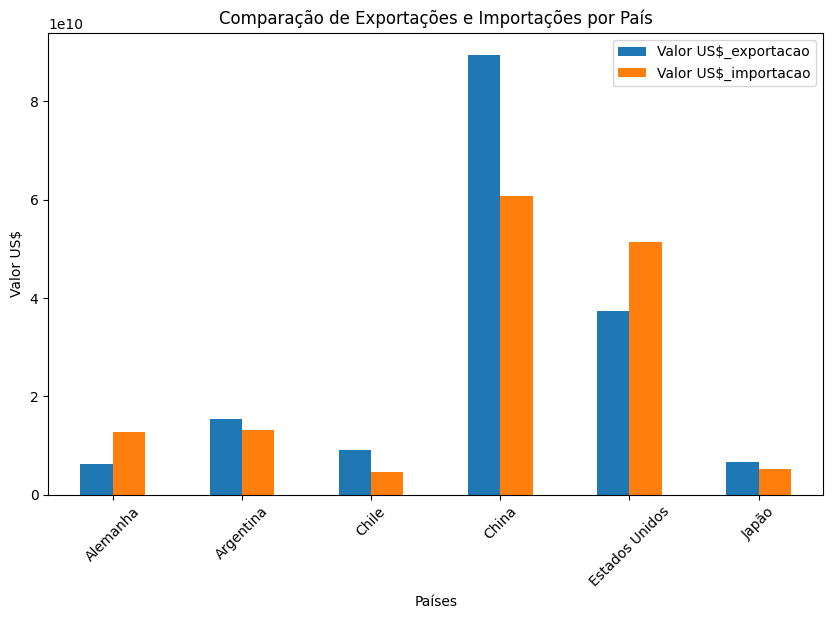

In [101]:
df['Fluxo'] = df['Fluxo'].str.strip()

df_exportacao = df[df['Fluxo'] == 'Exportação']
df_importacao = df[df['Fluxo'] == 'Importação']

df_exportacao_total = df_exportacao.groupby('Países')['Valor US$'].sum().reset_index()
df_importacao_total = df_importacao.groupby('Países')['Valor US$'].sum().reset_index()

df_merged = pd.merge(df_exportacao_total, df_importacao_total, on='Países', how='outer', suffixes=('_exportacao', '_importacao'))

df_merged['saldo'] = df_merged['Valor US$_exportacao'] - df_merged['Valor US$_importacao']

df_merged['balanca'] = df_merged['saldo'].apply(lambda x: 'Superávit' if x > 0 else 'Déficit')

df_merged.set_index('Países')[['Valor US$_exportacao', 'Valor US$_importacao']].plot(kind='bar', figsize=(10, 6))
plt.title('Comparação de Exportações e Importações por País')
plt.ylabel('Valor US$')
plt.xticks(rotation=45)
plt.show()


<ipython-input-102-36eef09b2795>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exportacao['Mês'] = df_exportacao['Mês'].str.strip().str.capitalize()
<ipython-input-102-36eef09b2795>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importacao['Mês'] = df_importacao['Mês'].str.strip().str.capitalize()


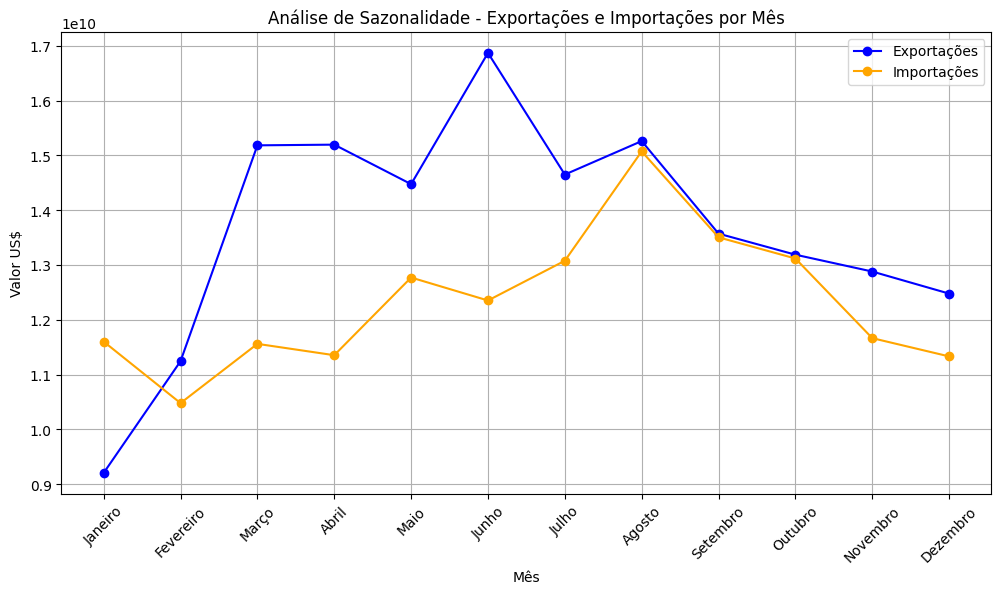

In [102]:
df_exportacao = df[df['Fluxo'] == 'Exportação']
df_importacao = df[df['Fluxo'] == 'Importação']

df_exportacao['Mês'] = df_exportacao['Mês'].str.strip().str.capitalize()
df_importacao['Mês'] = df_importacao['Mês'].str.strip().str.capitalize()

ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

df_exportacao_mes = (df_exportacao.groupby('Mês')['Valor US$']
                     .sum()
                     .reset_index())
df_exportacao_mes['Mês'] = pd.Categorical(df_exportacao_mes['Mês'], categories=ordem_meses, ordered=True)
df_exportacao_mes = df_exportacao_mes.sort_values('Mês')

df_importacao_mes = (df_importacao.groupby('Mês')['Valor US$']
                     .sum()
                     .reset_index())
df_importacao_mes['Mês'] = pd.Categorical(df_importacao_mes['Mês'], categories=ordem_meses, ordered=True)
df_importacao_mes = df_importacao_mes.sort_values('Mês')

plt.figure(figsize=(12, 6))
plt.plot(df_exportacao_mes['Mês'], df_exportacao_mes['Valor US$'],
         marker='o', label='Exportações', color='blue')
plt.plot(df_importacao_mes['Mês'], df_importacao_mes['Valor US$'],
         marker='o', label='Importações', color='orange')

plt.title('Análise de Sazonalidade - Exportações e Importações por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor US$')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [129]:
mapa_descricao = {
    'Plásticos e suas obras; Borracha e suas obras': 'Plásticos e Borracha',
    'Máquinas e aparelhos, material elétrico e suas partes; Aparelhos de gravação ou reprodução de som, aparelhos de gravação ou reprodução de imagens e de som em televisão, e suas partes e acessórios': 'Máquinas e material elétrico',
    'Animais vivos e produtos do reino animal': 'Animais vivos, produtos animal',
    'Gorduras e óleos animais ou vegetais; Produtos da sua dossociação; Gorduras alimentares elaboradas; Ceras de origem animal ou vegetal': 'Gorduras e óleos animais/vegetais',
    'Produtos das indústrias químicas ou indústrias conexas': 'Produtos químicos',
    'Pérolas naturais ou cultivadas, pedras preciosas ou semipreciosas e semelhantes, metais preciosos, metais folheados ou chapeados de metais preciosos, e suas obras; Bijuteria; Moedas': 'Pérolas e bijuterias',
    'Metais comuns e suas obras': 'Metais comuns',
    'Material de transporte': 'Material de transporte',
    'Produtos do reino vegetal': 'Produtos vegetais',
    'Produtos das indútrias alimentares; Bebidas, líquidos alcoólicos e vinagres; Tabaco e seus sucedâneos manufaturados': 'Indústria alimentícia, bebidas e tabaco',
    'Produtos minerais': 'Minério',
    'Peles, couros, peles com pelo e obras destas matérias; Artigos de correeiro ou de seleiro; Artigos de viagem, bolsas e artefatos semelhantes; Obras de tripa': 'Peles, couros e artigos relacionados',
    'Pastas de madeira ou de outras matérias fibrosas celulósicas; Papel ou cartão para reciclar (desperdícios e aparas); Papel e suas obras': 'Papel, pasta de madeira e reciclados',
    'Matérias têxteis e suas obras': 'Matérias têxteis e obras',
    'Instrumentos e aparelhos de ótica, fotografia ou cinematografia, medida, controle ou de precisão; Instrumentos e aparelhos médico-cirúrgicos; Relógios e aparelhos semelhantes; Instrumentos musicais; Suas partes e acessórios': 'Instrumentos óticos, médicos e musicais',
    'Calçado, chapéus e artefatos de uso semelhante, guarda-chuvas, guarda-sóis, bengalas, chicotes e suas partes; Penas preparadas e suas obras; Flores artificiais; Obras de cabelo': 'Calçados, chapéus e artefatos',
    'Obras de pedra, gesso, cimento, amianto, mica ou de matérias semelhantes; Produtos cerâmicos; Vidro e suas obras': 'Obras de pedra, vidro, cerâmica e cimento',
    'Mercadorias e produtos diversos': 'Mercadorias diversas',
    'Madeira, carvão vegetal e obras de madeira; Cortiça e suas obras; Obras de espartaria ou de cestaria': 'Madeira, carvão e obras de madeira',
    'Objetos de arte, de coleção e antiguidades': 'Objetos de arte e antiguidades',
    'Armas e munições; suas partes e acessórios': 'Armas, munições e acessórios'
}

df['Descricao'] = df['Descricao'].replace(mapa_descricao)

df.head()

,Fluxo,Ano,Mês,Países,Estados,Descricao,Valor US$
0,Exportação,2022,Dezembro,Alemanha,Alagoas,Plásticos e Borracha,10276
1,Exportação,2022,Dezembro,Alemanha,Alagoas,"Máquinas, aparelhos e material elétrico",5187
2,Exportação,2022,Dezembro,Alemanha,Amazonas,"Animais vivos, produtos animal",41850
3,Exportação,2022,Dezembro,Alemanha,Amazonas,"Gorduras, óleos e ceras animais/vegetais",23479
4,Exportação,2022,Dezembro,Alemanha,Amazonas,Produtos químicos,17510


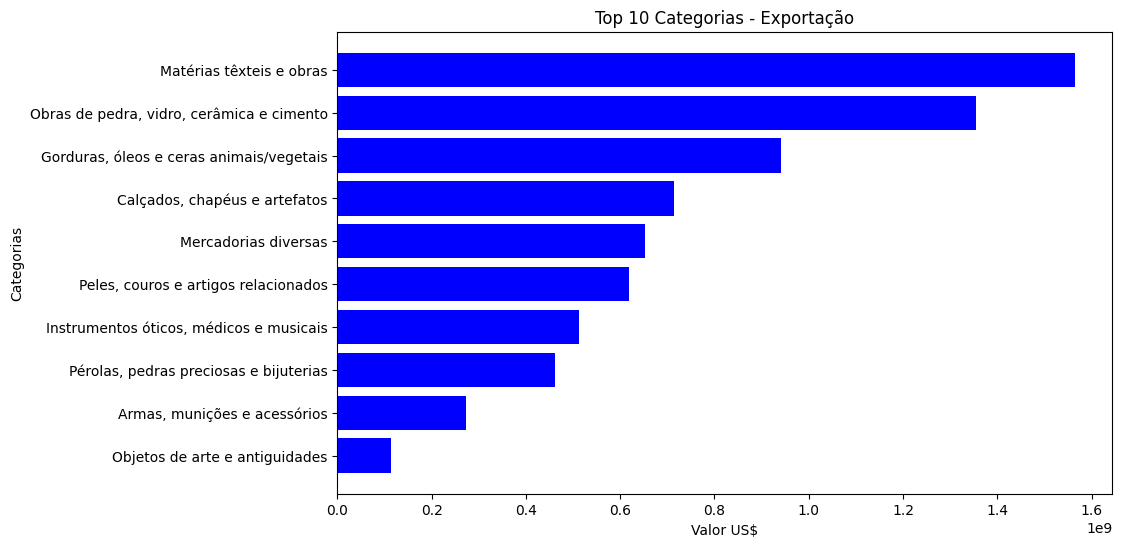

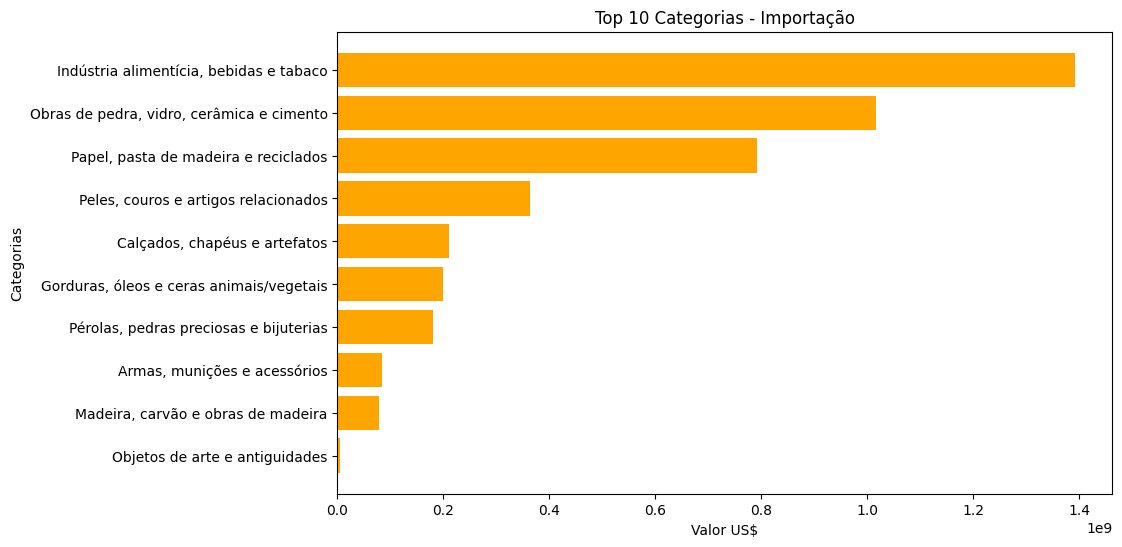

In [141]:
df_exportacao = df[df['Fluxo'] == 'Exportação']
df_importacao = df[df['Fluxo'] == 'Importação']

df_exportacao_estado = df_exportacao.groupby('Descricao')['Valor US$'].sum().reset_index()
df_importacao_estado = df_importacao.groupby('Descricao')['Valor US$'].sum().reset_index()

df_merged_estado = pd.merge(df_exportacao_estado, df_importacao_estado, on='Descricao', how='outer', suffixes=('_exportacao', '_importacao'))

df_merged_estado.head()

top_exportacao = df_merged_estado.sort_values('Valor US$_exportacao',).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_exportacao['Descricao'], top_exportacao['Valor US$_exportacao'], color='blue')
plt.title('Top 10 Categorias - Exportação')
plt.xlabel('Valor US$')
plt.ylabel('Categorias')
plt.show()

top_importacao = df_merged_estado.sort_values('Valor US$_importacao',).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_importacao['Descricao'], top_importacao['Valor US$_importacao'], color='orange')
plt.title('Top 10 Categorias - Importação')
plt.xlabel('Valor US$')
plt.ylabel('Categorias')
plt.show()



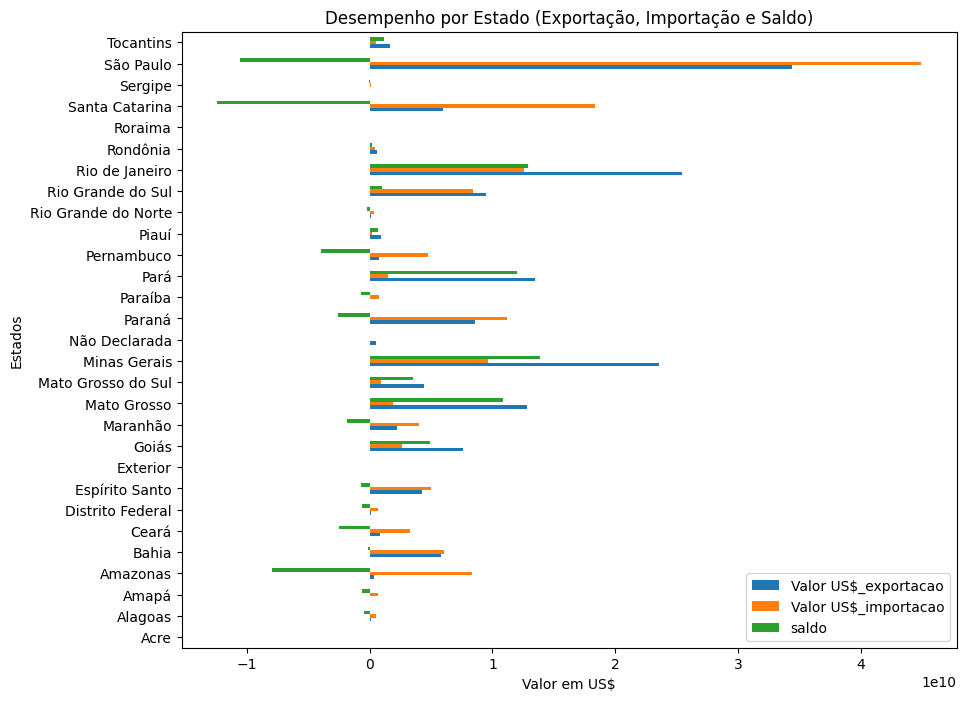

In [154]:
df_exportacao = df[df['Fluxo'] == 'Exportação']
df_importacao = df[df['Fluxo'] == 'Importação']

df_exportacao_estado = df_exportacao.groupby('Estados')['Valor US$'].sum().reset_index()
df_importacao_estado = df_importacao.groupby('Estados')['Valor US$'].sum().reset_index()

df_merged_estado = pd.merge(df_exportacao_estado, df_importacao_estado, on='Estados', how='outer', suffixes=('_exportacao', '_importacao'))

df_merged_estado['saldo'] = df_merged_estado['Valor US$_exportacao'] - df_merged_estado['Valor US$_importacao']

df_merged_estado.head()

df_merged_estado.set_index('Estados')[['Valor US$_exportacao', 'Valor US$_importacao', 'saldo']].plot(kind='barh', figsize=(10, 8))

plt.title('Desempenho por Estado (Exportação, Importação e Saldo)')
plt.xlabel('Valor em US$')
plt.ylabel('Estados')
plt.show()